In [1]:
import pandas as pd
# import df
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')
df = pd.read_csv('df.csv')
df.head()

,Year-Month,Outbreaks,Price,bacon price,potato price,soybean price,wheat price,corn price,Christmas,Thanksgiving,Passover/Easter,gas price
0,2022-02,8,2.005,7.097,0.802,15.885375,390.50,6.500600,False,False,False,3.611
1,2022-03,56,2.046,7.203,0.825,16.733152,486.30,7.465652,False,False,False,4.322
2,2022-04,68,2.520,7.422,0.849,16.798190,495.28,7.859310,False,False,True,4.213
3,2022-05,56,2.863,7.364,0.875,16.583690,522.29,7.838690,False,False,False,4.545
4,2022-06,14,2.707,7.403,0.891,16.876064,459.59,7.597964,False,False,False,5.032


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   33
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -15.727
Date:                Sat, 10 May 2025   AIC                             37.454
Time:                        09:41:32   BIC                             41.851
Sample:                             0   HQIC                            38.912
                                 - 33                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1783      0.475      0.376      0.707      -0.752       1.109
ma.L1          0.1670      0.493      0.339      0.735      -0.799       1.133
sigma2         0.1559      0.052      2.971      0.0

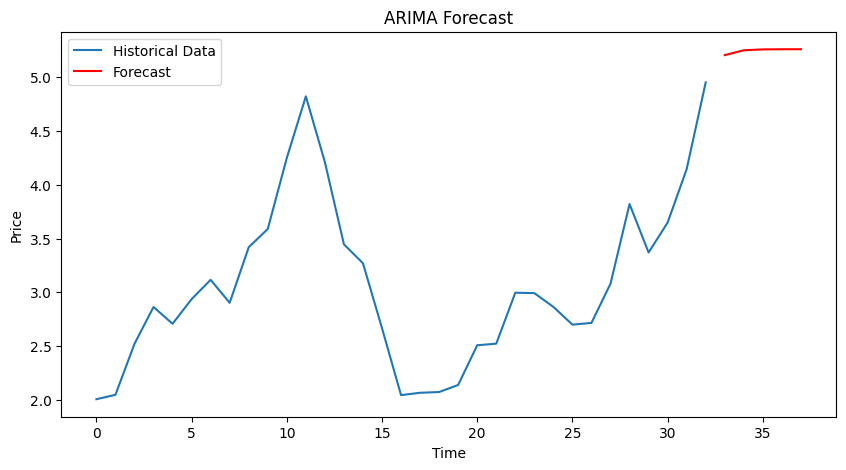

In [10]:
# Build an ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Price'], order=(1, 1, 1))  # Adjust the order as needed
# order (number of lagged observations (past y) used as predictors, 
# number of times data is differenced to make it stationary, 
# number of MA terms (number of lagged forecast errors))
model_fit = model.fit()
print(model_fit.summary())
# Forecast the next 5 time steps
forecast = model_fit.forecast(steps=5)
print(forecast)
# Plot the forecast
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df['Price'], label='Historical Data')
plt.plot(range(len(df), len(df) + 5), forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [3]:
# use adf to test for stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Price'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.5276814888381784
p-value: 0.5197759813289464


p-value is > 0.05, use at least 1

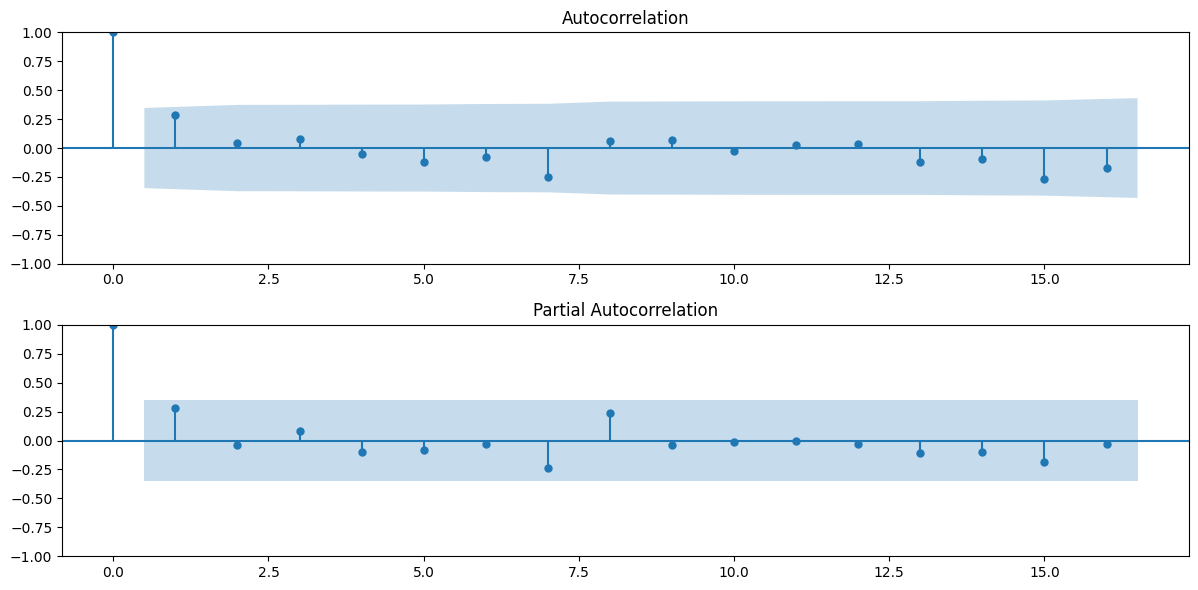

In [4]:
# Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(df['Price'].diff().dropna(), lags=16, ax=ax[0])
plot_pacf(df['Price'].diff().dropna(), lags=16, ax=ax[1])
plt.tight_layout()
plt.show()

spikes at 1 and 1, use order(1, 1, 1)